# Linear Regression
This is a basic implementation of the linear regression algorithm. Given a set of points, the algorithm tries to fit a straight line through them in order to minimize the $mse$ cost function. Formally, the $mse$ function is defined as follows: $mse = \frac{1}{N}\sum_{i=1}^N (prediction_i - y_i)^2$, where, since the algorithm fits a straigt line to the data, $prediction_i$ has the form $prediction_i = x_i \cdot m + a$, $m$ and $a$ are the parameters the algorithm will learn. <br> 
The two parameters are initialized randomly at first, then the algorithm tries to learn them through the gradient descent algorithm. In particular, the contribution of the parameters is evaluating computing the partial derivatives of the cost function with respect to them. Formally: $$\frac{\partial mse}{\partial a} = \frac{2}{N}\sum_{i=1}^N(prediction_i - y_i)$$ $$\frac{\partial mse}{\partial m} = \frac{2}{N}\sum_{i=1}^N(prediction_i - y_i)x_i$$
The parameters are then updated through the learning rule $param = param - lr \cdot \frac{\partial mse}{\partial param}$, where $lr$ is the learning rate. The learning is carried on for a specified number of epochs.

In [1]:
import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
from LinearRegression import LinearRegression

In [4]:
from itertools import chain

## Random Points Generation
Here some points are generated in order to test the algorithm. The points are generated by adding some random (uniform) noise to the y-coordinate of random points on the line described by the equation $y = 10x + 4$.

In [127]:
x_min = 0
x_max = 50

line_bias = 4
line_slope = 10

noise_amp = 220

n_points_dataset = 100

train_ratio = 0.7

In [128]:
x_axis = np.linspace(x_min, x_max, n_points_dataset)
original_y = line_slope * x_axis + line_bias

uniform_noise = np.random.uniform(-noise_amp, noise_amp, n_points_dataset)
sampled_y = original_y + uniform_noise

In [129]:
not_shuffled_dataset = np.c_[x_axis, sampled_y]
dataset = not_shuffled_dataset[:]
np.random.shuffle(dataset)

In [130]:
n_train_samples = int(train_ratio*n_points_dataset)
train_data = dataset[:n_train_samples]
test_data = dataset[n_train_samples:]

In [131]:
n_test_samples = len(test_data)

In [132]:
print(f'# train samples: {n_train_samples}')
print(f'# test samples: {n_test_samples}')

# train samples: 70
# test samples: 30


In [133]:
dataset[:5]

array([[  45.95959596,  621.42152168],
       [   1.51515152, -134.63437287],
       [  16.66666667,   45.84318828],
       [  30.80808081,  112.35744286],
       [  25.75757576,  301.78989234]])

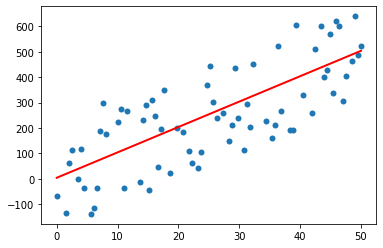

In [134]:
plt.scatter(train_data[:,0], train_data[:,1], linewidths=0.001)
plt.plot(x_axis, original_y, color="red", linewidth=2)
plt.show()

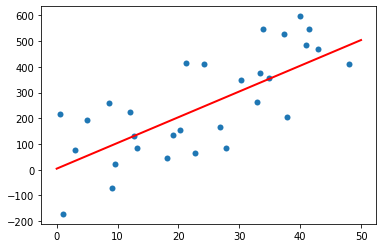

In [135]:
plt.scatter(test_data[:,0], test_data[:,1], linewidths=0.001)
plt.plot(x_axis, original_y, color="red", linewidth=2)
plt.show()

## Fitting The Model
It is pretty straightforward to fit the model to the generated points through the fit method. The fit method will return the value of the $mse$ computed on the input data after the training. As you can see from the notebook, it is possible to train the model incrementally.

In [136]:
n_epochs_train = 50

In [137]:
lr = LinearRegression()

In [138]:
train_mses = [lr.fit(train_data, learning_rate=0.001, epochs=1) for i in range(n_epochs_train)]

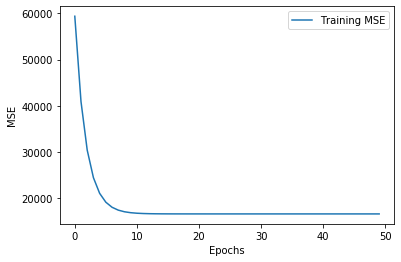

In [139]:
plt.plot(range(n_epochs_train), train_mses, label="Training MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Predicting Points

In [140]:
train_predictions = np.array([lr.predict(xi) for xi in train_data[:, 0]])

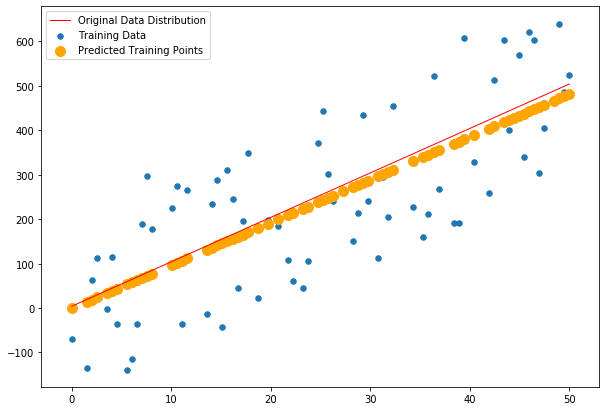

In [141]:
figure(figsize=(10, 7))

plt.scatter(train_data[:, 0], train_data[:, 1], s=30, label='Training Data')
plt.scatter(train_data[:, 0], train_predictions, s=100, color="orange", label='Predicted Training Points')
plt.plot(x_axis, original_y, color="red", linewidth=1, label='Original Data Distribution')
plt.legend()
plt.show()

In [142]:
test_predictions = np.array([lr.predict(xi) for xi in test_data[:, 0]])

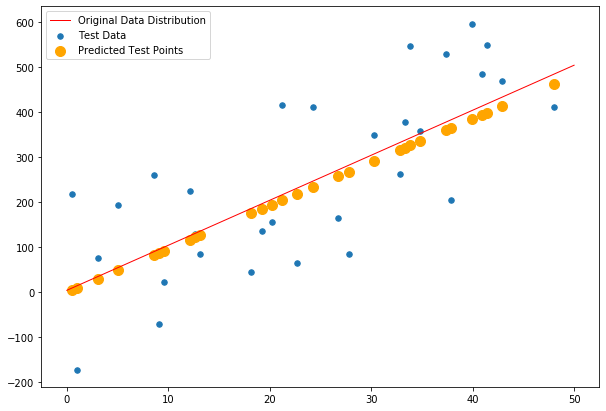

In [143]:
figure(figsize=(10, 7))

plt.scatter(test_data[:, 0], test_data[:, 1], s=30, label='Test Data')
plt.scatter(test_data[:, 0], test_predictions, s=100, color="orange", label='Predicted Test Points')
plt.plot(x_axis, original_y, color="red", linewidth=1, label='Original Data Distribution')
plt.legend()
plt.show()

## Plotting The Fitted Line
It is also possible to plot the line that the model learned.

In [144]:
m, a = lr.get_params()

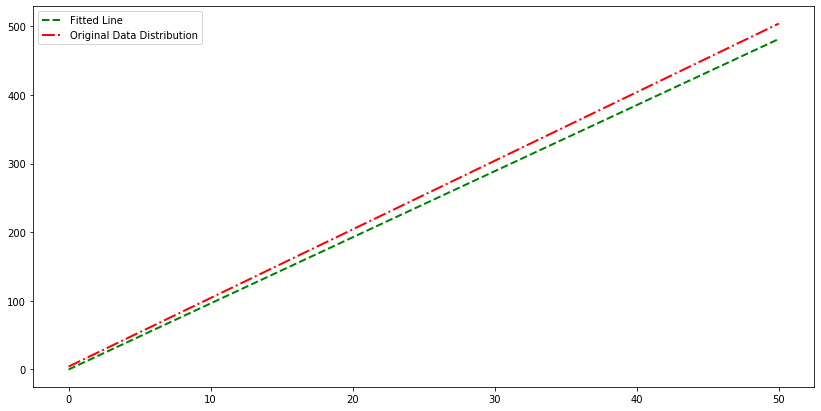

In [145]:
figure(figsize=(14, 7))

plt.plot(x_axis, m*x_axis+a, '--', color="green", linewidth=2, label='Fitted Line')
plt.plot(x_axis, original_y,'-.', color="red", linewidth=2, label='Original Data Distribution')
plt.legend()
plt.show()

## Evaluating the Model

In [146]:
train_mse = np.mean((train_data[:, 1] - train_predictions)**2)
print(f'Train MSE: {train_mse}')

Train MSE: 16579.919799963984


In [147]:
test_mse = np.mean((test_data[:, 1] - test_predictions)**2)
print(f'Test MSE: {test_mse}')

Test MSE: 17827.361664715383
